https://python.langchain.com/docs/use_cases/question_answering/

# Q&A

In [9]:
# #read first line of text file openai_api_key.txt
# OPENAI_API_KEY = open('../../openai_api_key', 'r').readline()

import os
from dotenv import find_dotenv, load_dotenv
_ = load_dotenv(find_dotenv())  # read local .env file
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]


In [10]:
%%sh
pip install -q openai chromadb


In [11]:
from langchain.llms import GPT4All
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.embeddings import GPT4AllEmbeddings

from langchain.document_loaders import WebBaseLoader
from langchain.document_loaders.recursive_url_loader import RecursiveUrlLoader
from bs4 import BeautifulSoup as Soup
from langchain.indexes import VectorstoreIndexCreator
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain.vectorstores import Chroma

In [12]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY)
embedding = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

#Callbacks support token-wise streaming
callbacks = [StreamingStdOutCallbackHandler()]

userpath=[
  '/Users/jlourier/Library/Application Support/',
  '/home/hfwittmann/.local/share/'
][1] # replace with your desired local file path

local_path = (
  f"{userpath}nomic.ai/GPT4All/ggml-model-gpt4all-falcon-q4_0.bin"  
)

llm = GPT4All(model=local_path, verbose=True)
embedding = GPT4AllEmbeddings(model=local_path)


Found model file at  /home/hfwittmann/.local/share/nomic.ai/GPT4All/ggml-model-gpt4all-falcon-q4_0.bin
falcon_model_load: loading model from '/home/hfwittmann/.local/share/nomic.ai/GPT4All/ggml-model-gpt4all-falcon-q4_0.bin' - please wait ...
falcon_model_load: n_vocab   = 65024
falcon_model_load: n_embd    = 4544
falcon_model_load: n_head    = 71
falcon_model_load: n_head_kv = 1
falcon_model_load: n_layer   = 32
falcon_model_load: ftype     = 2
falcon_model_load: qntvr     = 0
falcon_model_load: ggml ctx size = 3872.64 MB
falcon_model_load: memory_size =    32.00 MB, n_mem = 65536
falcon_model_load: ........................ done
falcon_model_load: model size =  3872.59 MB / num tensors = 196
Found model file at  /home/hfwittmann/.cache/gpt4all/ggml-all-MiniLM-L6-v2-f16.bin


In [13]:
url = "https://www.lufthansa-industry-solutions.com/de-en/"
loader = RecursiveUrlLoader(url=url, max_depth=2, extractor=lambda x: Soup(x, "html.parser").text)
data = loader.load()

In [14]:
index = VectorstoreIndexCreator(embedding=embedding).from_loaders([loader])


In [15]:
index.query("Who is Bernhard Kube?", llm=llm)

' Bernhard Kube is the Vice President of Artificial Intelligence & Data Analytics at Lufthansa Industry Solutions.'

## Step 1: Load

In [16]:
#from langchain.document_loaders import WebBaseLoader

#loader = WebBaseLoader("https://www.lufthansa-industry-solutions.com/de-en/")
#data = loader.load()

In [17]:
print(data[0])

page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProject management: consulting and management of your IT projects | LHIND\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        Menü\n    \n\n\n\n\nLufthansa Industry Solutions\n\n\n\n\n\n\n\n\nSolutions & Products\n\n\nReferences\n\n\nCareer\n\n\nCompany\n\n\n\n\nEvents\n\n\nNewsroom & Downloads\n\n\nStudies & Whitepaper\n\n\n\n\n\n\n\nContact\n\n\nSearch\n\n\nDeutsch\n\n\n\n\n\nCancel with ESC / Start with Enter\n\nSearch term\n\n\n\n\nStart search\n\n\n\n\n\n\n\n\n            Share this page\n        \n\n\n                LinkedIn\n            \n\n                XING\n            \n\n                Email\n            \n\n\n\n\n\n\nIT Project Management\n\n                Project management consulting – implementing complex IT projects in a time and cost-efficient manner  \n            \n\n\n\n\n\n\n\n                    Please contact me:\n                \n\n\n\n\nStefan Ritter\nSales Man

## Step 2: Split

In [18]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 0)
all_splits = text_splitter.split_documents(data)

In [19]:
all_splits

[Document(page_content='Project management: consulting and management of your IT projects | LHIND\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        Menü\n    \n\n\n\n\nLufthansa Industry Solutions\n\n\n\n\n\n\n\n\nSolutions & Products\n\n\nReferences\n\n\nCareer\n\n\nCompany\n\n\n\n\nEvents\n\n\nNewsroom & Downloads\n\n\nStudies & Whitepaper\n\n\n\n\n\n\n\nContact\n\n\nSearch\n\n\nDeutsch\n\n\n\n\n\nCancel with ESC / Start with Enter\n\nSearch term\n\n\n\n\nStart search\n\n\n\n\n\n\n\n\n            Share this page\n        \n\n\n                LinkedIn', metadata={'source': 'https://www.lufthansa-industry-solutions.com/de-en/solutions-products/project-management-consulting', 'title': 'Project management: consulting and management of your IT projects | LHIND', 'description': 'Professional support for your digitalization projects ✔ IT projects of all kinds ✔ Classic, agile, hybrid ✔ Certified coaches ✔ Learn more now ', 'language': 'en'}),
 Documen

## Step 3: Store

In [20]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

vectorstore = Chroma.from_documents(documents=all_splits, embedding=embedding)

## Step 4: Retrieve

In [21]:
question = "Who is Bernhard Kube?"
docs = vectorstore.similarity_search(question)
len(docs)

4

In [22]:
docs

[Document(page_content='Rainer Liebhart\nVice President Air Cargo Logistics\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nSusanne Mierscheid\nVice President Application Management & DevOps\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nChristian Rothkirch\nVice President Corporate & Aviation Services\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nAlbana Shkurta\nManaging Director Location Albania - Lufthansa Industry Solutions Shpk\n\n\nEmail\n\n\n\n\n\n\n\n\n\n\n\n\nRalf Struckmeier\nVice President Logistics\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nBernhard Kube\nVice President Artificial Intelligence & Data Analytics\n\n\nE-Mail', metadata={'source': 'https://www.lufthansa-industry-solutions.com/de-en/company#certification', 'title': 'Your partner for IT consulting and systems integration', 'description': 'As an IT consultant and systems integrator, Lufthansa Industry Solutions covers the whole range of IT services and assists companies during digitization and automation.', 'language': 'en'}),
 Document(page_content

In [23]:
docs[0]

Document(page_content='Rainer Liebhart\nVice President Air Cargo Logistics\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nSusanne Mierscheid\nVice President Application Management & DevOps\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nChristian Rothkirch\nVice President Corporate & Aviation Services\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nAlbana Shkurta\nManaging Director Location Albania - Lufthansa Industry Solutions Shpk\n\n\nEmail\n\n\n\n\n\n\n\n\n\n\n\n\nRalf Struckmeier\nVice President Logistics\n\n\nE-Mail\n\n\n\n\n\n\n\n\n\n\n\n\nBernhard Kube\nVice President Artificial Intelligence & Data Analytics\n\n\nE-Mail', metadata={'source': 'https://www.lufthansa-industry-solutions.com/de-en/company#certification', 'title': 'Your partner for IT consulting and systems integration', 'description': 'As an IT consultant and systems integrator, Lufthansa Industry Solutions covers the whole range of IT services and assists companies during digitization and automation.', 'language': 'en'})

## Step 5: Generate

In [24]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

qa_chain = RetrievalQA.from_chain_type(llm,retriever=vectorstore.as_retriever())
qa_chain({"query": question})

{'query': 'Who is Bernhard Kube?',
 'result': ' Bernhard Kube is the Vice President Artificial Intelligence &amp; Data Analytics.'}

## Step 6: Converse

In [25]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [26]:
from langchain.chains import ConversationalRetrievalChain

retriever = vectorstore.as_retriever()
chat = ConversationalRetrievalChain.from_llm(llm, retriever=retriever, memory=memory)

In [27]:
result = chat({'question': 'Who is Bernhard Kube?'})
result['answer']

' Bernhard Kube is the Vice President Artificial Intelligence &amp; Data Analytics.'

In [28]:
result = chat({'question': 'What is his role at Lufthansa?'})
result['answer']

'  Based on the given context, it is not clear who "he" refers to. Please provide more information or context for me to answer your question accurately.'

# Evaluation

## Test Questions

In [29]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import QAGenerationChain
#from gptcache.adapter.langchain_models import LangChainChat

In [30]:
# chat = ChatOpenAI(temperature=0) # using the following code to cache with gptcache
#chat = LangChainChat(chat=ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY))

chain = QAGenerationChain.from_llm(llm=ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY), text_splitter=text_splitter, k=10) 

In [31]:
data[0].page_content

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProject management: consulting and management of your IT projects | LHIND\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        Menü\n    \n\n\n\n\nLufthansa Industry Solutions\n\n\n\n\n\n\n\n\nSolutions & Products\n\n\nReferences\n\n\nCareer\n\n\nCompany\n\n\n\n\nEvents\n\n\nNewsroom & Downloads\n\n\nStudies & Whitepaper\n\n\n\n\n\n\n\nContact\n\n\nSearch\n\n\nDeutsch\n\n\n\n\n\nCancel with ESC / Start with Enter\n\nSearch term\n\n\n\n\nStart search\n\n\n\n\n\n\n\n\n            Share this page\n        \n\n\n                LinkedIn\n            \n\n                XING\n            \n\n                Email\n            \n\n\n\n\n\n\nIT Project Management\n\n                Project management consulting – implementing complex IT projects in a time and cost-efficient manner  \n            \n\n\n\n\n\n\n\n                    Please contact me:\n                \n\n\n\n\nStefan Ritter\nSales Manager\n\n\n\n\

In [32]:
from langchain.document_loaders import WebBaseLoader

loader_qa = WebBaseLoader("https://www.lufthansa-industry-solutions.com/de-en/company")
data_qa = loader_qa.load()

qa = chain.run(data_qa[0].page_content)
qa

[{'question': "What is the company's main focus?",
  'answer': 'IT consulting and systems integration'},
 {'question': "What is Lufthansa Industry Solutions' role in company digitization?",
  'answer': 'Lufthansa Industry Solutions is the right partner for company digitization.'},
 {'question': 'What is the strength of our IT service provider?',
  'answer': 'Our strength as an IT service provider lies in our ability to combine technical know-how with process and industry knowledge and entrepreneurial thinking.'},
 {'question': "What does 'cross-industry experience' refer to?",
  'answer': "'Cross-industry experience' refers to having work or knowledge in multiple different industries."},
 {'question': 'What is the main challenge that all customers mentioned in the text face?',
  'answer': 'The main challenge that all customers mentioned in the text face is structuring their IT to reduce costs and increase revenues and efficiency.'},
 {'question': 'What is the main focus of the text?',


In [38]:
qa

[{'question': "What is the company's main focus?",
  'answer': 'IT consulting and systems integration'},
 {'question': "What is Lufthansa Industry Solutions' role in company digitization?",
  'answer': 'Lufthansa Industry Solutions is the right partner for company digitization.'},
 {'question': 'What is the strength of our IT service provider?',
  'answer': 'Our strength as an IT service provider lies in our ability to combine technical know-how with process and industry knowledge and entrepreneurial thinking.'},
 {'question': "What does 'cross-industry experience' refer to?",
  'answer': "'Cross-industry experience' refers to having work or knowledge in multiple different industries."},
 {'question': 'What is the main challenge that all customers mentioned in the text face?',
  'answer': 'The main challenge that all customers mentioned in the text face is structuring their IT to reduce costs and increase revenues and efficiency.'},
 {'question': 'What is the main focus of the text?',


In [39]:
qa

[{'question': "What is the company's main focus?",
  'answer': 'IT consulting and systems integration'},
 {'question': "What is Lufthansa Industry Solutions' role in company digitization?",
  'answer': 'Lufthansa Industry Solutions is the right partner for company digitization.'},
 {'question': 'What is the strength of our IT service provider?',
  'answer': 'Our strength as an IT service provider lies in our ability to combine technical know-how with process and industry knowledge and entrepreneurial thinking.'},
 {'question': "What does 'cross-industry experience' refer to?",
  'answer': "'Cross-industry experience' refers to having work or knowledge in multiple different industries."},
 {'question': 'What is the main challenge that all customers mentioned in the text face?',
  'answer': 'The main challenge that all customers mentioned in the text face is structuring their IT to reduce costs and increase revenues and efficiency.'},
 {'question': 'What is the main focus of the text?',


## Test data

In [41]:
import pandas as pd

In [42]:
pd.DataFrame(qa)

,question,answer
0,What is the company's main focus?,IT consulting and systems integration
1,What is Lufthansa Industry Solutions' role in ...,Lufthansa Industry Solutions is the right part...
2,What is the strength of our IT service provider?,Our strength as an IT service provider lies in...
3,What does 'cross-industry experience' refer to?,'Cross-industry experience' refers to having w...
4,What is the main challenge that all customers ...,The main challenge that all customers mentione...
...,...,...
58,What is the name of the organization with the ...,"Deutschsprachige SAP-Anwendergruppe e. V., Ham..."
59,What are the names of the three official websi...,"Logistik-Initiative Hamburg, Maritimes Cluster..."
60,What is the official website of Bundesverband ...,The official website of Bundesverband WindEner...
61,What certifications does the company have?,"Tisax, ISO27001"


In [43]:
#test_data = pd.DataFrame.from_records(qa)
test_data = pd.DataFrame(qa) # pd.read_csv('test_data.csv')


In [ ]:
#test_data['pred_openai'] = test_data.apply(lambda row: index.query(row.question, llm=llm) , axis=1)
#test_data['pred_falcon'] = test_data.apply(lambda row: index.query(row.question, llm=llm) , axis=1)

In [44]:
test_data.head(10)

,question,answer
0,What is the company's main focus?,IT consulting and systems integration
1,What is Lufthansa Industry Solutions' role in ...,Lufthansa Industry Solutions is the right part...
2,What is the strength of our IT service provider?,Our strength as an IT service provider lies in...
3,What does 'cross-industry experience' refer to?,'Cross-industry experience' refers to having w...
4,What is the main challenge that all customers ...,The main challenge that all customers mentione...
5,What is the main focus of the text?,The main focus of the text is companies' futur...
6,What does Lufthansa Industry Solutions focus o...,Lufthansa Industry Solutions focuses on the cu...
7,What two factors contribute to our ability to ...,Our project experience and industry expertise
8,What does Lufthansa Industry Solutions offer a...,Lufthansa Industry Solutions offers a comprehe...
9,Why is the aviation industry highly digitized ...,Because our roots are in aviation.


In [45]:
test_data.columns

Index(['question', 'answer'], dtype='object')

In [ ]:
test_prediction = index.query(qa[0]['question'], llm=llm)
print(f"{test_prediction=}")

test_prediction=" Lufthansa Industry Solutions' main focus as an IT service provider is to help companies digitize and automate their business processes, while also taking into account the company's internal and external challenges. They focus on the entire business, not just the IT, and understand that digital transformation affects more than just the company's structure and culture, but also its relationships with partners, customers, and suppliers."


In [47]:
row = 6

for c in test_data.columns:
    print(f"{c}: {test_data.iloc[row][c]}")

question: What does Lufthansa Industry Solutions focus on when helping companies digitize and automate their business processes?
answer: Lufthansa Industry Solutions focuses on the customer's business as a whole, including its internal and external challenges.


## Evaluate

In [48]:
llm_eval = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

In [49]:
#eval_data = test_data.copy()
#eval_data = pd.read_csv('eval_data_all.csv')

### Eyeballing

In [51]:
eval_data.iloc[[6]][['question', 'answer', 'pred_openai', 'pred_falcon']]

NameError: name 'eval_data' is not defined

In [92]:
pred_openai_eye_score = [
    1, #0
    0,
    0,
    1,
    1, #4
    1,
    1,
] 

pred_falcon_eye_score = [
    1, #0
    0.5,
    0,
    1,
    1, #4
    0,
    1,
] 

eval_data['pred_openai_eye_score'] = pred_openai_eye_score
eval_data['pred_falcon_eye_score'] = pred_falcon_eye_score

### Criteria Evaluation

https://python.langchain.com/docs/guides/evaluation/string/criteria_eval_chain

In [25]:
from langchain.evaluation import Criteria

In [26]:
list(Criteria)

[<Criteria.CONCISENESS: 'conciseness'>,
 <Criteria.RELEVANCE: 'relevance'>,
 <Criteria.CORRECTNESS: 'correctness'>,
 <Criteria.COHERENCE: 'coherence'>,
 <Criteria.HARMFULNESS: 'harmfulness'>,
 <Criteria.MALICIOUSNESS: 'maliciousness'>,
 <Criteria.HELPFULNESS: 'helpfulness'>,
 <Criteria.CONTROVERSIALITY: 'controversiality'>,
 <Criteria.MISOGYNY: 'misogyny'>,
 <Criteria.CRIMINALITY: 'criminality'>,
 <Criteria.INSENSITIVITY: 'insensitivity'>,
 <Criteria.DEPTH: 'depth'>,
 <Criteria.CREATIVITY: 'creativity'>,
 <Criteria.DETAIL: 'detail'>]

In [51]:
from langchain.evaluation import load_evaluator
from langchain.evaluation import EvaluatorType

evaluator = load_evaluator(EvaluatorType.LABELED_CRITERIA , llm=llm_eval, criteria="helpfulness")

In [52]:
eval_result = evaluator.evaluate_strings(
    input=test_data.iloc[0]['question'],
    prediction=test_data.iloc[0]['pred_openai'],
    reference=test_data.iloc[0]['answer'],
)

eval_result

{'reasoning': "The submission states that Lufthansa Industry Solutions' main focus is to help companies digitize and automate their business processes, while also taking into account the company's internal and external challenges. It also states that they focus on the entire business, not just the IT, and understand that digital transformation affects more than just the company's structure and culture, but also its relationships with partners, customers, and suppliers.\n\nThe criteria is helpfulness: Is the submission helpful, insightful, and appropriate?\n\nThe submission is helpful, as it provides an answer to the question and provides additional information about the company's focus. It is also insightful, as it provides an understanding of the company's focus beyond just the technical aspects. It is appropriate, as it is in line with the reference given.\n\nTherefore, the submission meets the criteria.\n\nY",
 'value': 'Y',
 'score': 1}

In [54]:
def get_criteria_evaluation(evaluator, input, prediction, reference):
    eval_result = evaluator.evaluate_strings(
        input=input,
        prediction=prediction,
        reference=reference,
    )

    return [eval_result['reasoning'], eval_result['value'], eval_result['score']]


In [56]:
for criteria in ['correctness', 'helpfulness', 'relevance']:
    evaluator = load_evaluator(EvaluatorType.LABELED_CRITERIA , llm=llm_eval, criteria=criteria)
    for pred in ['pred_openai', 'pred_falcon']:
        eval_data[[f"{pred}_{criteria}_reasoning", f"{pred}_{criteria}_value", f"{pred}_{criteria}_score"]] = eval_data.apply(lambda row: get_criteria_evaluation(evaluator, row.question, row[pred], row.answer), axis=1, result_type="expand")


In [76]:
eval_data.head()

,question,answer,pred_openai,pred_falcon,pred_openai_helpfulness_reasoning,pred_openai_helpfulness_value,pred_openai_helpfulness_score,pred_falcon_helpfulness_reasoning,pred_falcon_helpfulness_value,pred_falcon_helpfulness_score,...,pred_openai_relevance_score,pred_falcon_relevance_reasoning,pred_falcon_relevance_value,pred_falcon_relevance_score,pred_openai_correctness_reasoning,pred_openai_correctness_value,pred_openai_correctness_score,pred_falcon_correctness_reasoning,pred_falcon_correctness_value,pred_falcon_correctness_score
0,What is Lufthansa Industry Solutions' main foc...,Lufthansa Industry Solutions' main focus as an...,Lufthansa Industry Solutions' main focus as a...,Lufthansa Industry Solutions' main focus as a...,The submission states that the main focus of L...,Y,1,Step 1: Read the submission and criteria.\n\nS...,Y,1,...,1,Step by step reasoning:\nThe submission refers...,Y,1,Step 1: Read the submission.\n\nStep 2: Read t...,Y,1,Step 1: Compare the submission to the criteria...,Y,1
1,What award did Lufthansa Industry Solutions re...,Lufthansa Industry Solutions received the top ...,Lufthansa Industry Solutions did not receive ...,Lufthansa Industry Solutions received the top...,"First, we need to determine if the submission ...",Y,1,The submission states that Lufthansa Industry ...,Y,1,...,0,The submission states that Lufthansa Industry ...,N,0,The submission states that Lufthansa Industry ...,N,0,The submission states that Lufthansa Industry ...,N,0
2,What is the name of the Managing Director ment...,Jörn Messner,The Managing Director mentioned in the text i...,The name of the Managing Director mentioned i...,"First, I will look at the criteria: helpfulnes...",Y,1,"Step 1: Evaluate if the submission is helpful,...",Y,1,...,0,Step 1: Check if the submission is referring t...,N,0,Step 1: Compare the submission with the refere...,N,0,Step 1: Look for accuracy in the submission.\n...,Y,1
3,What are the areas in which Lufthansa Industry...,"Cloud Platform, DevOps, Data Analytics",Lufthansa Industry Solutions is a Microsoft G...,Lufthansa Industry Solutions is a Microsoft G...,Step 1: Evaluate the submission against the cr...,Y,1,Step 1: Analyzing the Criteria: Does the submi...,Y,1,...,1,Step 1: Does the submission refer to a real qu...,N,0,Step 1: Verify accuracy of submission:\nThe su...,Y,1,"Step 1: Check if the submission is correct, ac...",Y,1
4,What is the nature of the partnership between ...,There has been a close strategic partnership b...,The partnership between Lufthansa Industry So...,The nature of the partnership between Lufthan...,The submission states that the partnership bet...,Y,1,The submission is helpful and insightful becau...,Y,1,...,1,"Yes, the submission meets the criteria.\n\nSte...",Y,1,"Step 1:\nThe submission must be correct, accur...",Y,1,"Yes, the submission meets the criteria. \n\nSt...",Y,1


In [6]:
#eval_data.to_csv('eval_data_criteria.csv', index=False)
eval_data = pd.read_csv('eval_data_criteria.csv')

In [63]:
pd.set_option('display.max_colwidth', 0)

In [59]:
cols = ['question', 'answer', 'pred_openai', 'pred_falcon'] + [c for c in eval_data.columns if 'score' in c]

eval_data[cols].head(7)

,question,answer,pred_openai,pred_falcon,pred_openai_helpfulness_score,pred_falcon_helpfulness_score,pred_openai_relevance_score,pred_falcon_relevance_score,pred_openai_correctness_score,pred_falcon_correctness_score
0,What is Lufthansa Industry Solutions' main focus as an IT service provider?,Lufthansa Industry Solutions' main focus as an IT service provider is to combine technical know-how with process and industry knowledge and entrepreneurial thinking.,"Lufthansa Industry Solutions' main focus as an IT service provider is to help companies digitize and automate their business processes, while also taking into account the company's internal and external challenges. They focus on the entire business, not just the IT, and understand that digital transformation affects more than just the company's structure and culture, but also its relationships with partners, customers, and suppliers.",Lufthansa Industry Solutions' main focus as an IT service provider is to help clients with the digital transformation of their companies through its services in IT consulting and system integration.,1,1,1,1,1,0
1,What award did Lufthansa Industry Solutions receive from the market analysis and consulting company PAC?,Lufthansa Industry Solutions received the top rating 'best in class' for 'sustainability-related IT consulting & services in Germany 2023' from PAC.,Lufthansa Industry Solutions did not receive an award from the market analysis and consulting company PAC.,"Lufthansa Industry Solutions received the top rating of four points from the market analysis and consulting company PAC for their Digital Factory solutions in the Predictive Analytics & Maintenance, Traceability, and Asset & Plant Performance Monitoring categories.",0,1,1,0,0,0
2,What is the name of the Managing Director mentioned in the text?,Jörn Messner,The Managing Director mentioned in the text is Albana Shkurta.,The name of the Managing Director mentioned in the text is Albana Shkurta.,1,1,0,0,0,0
3,What are the areas in which Lufthansa Industry Solutions is a Microsoft Gold Partner?,"Cloud Platform, DevOps, Data Analytics","Lufthansa Industry Solutions is a Microsoft Gold Partner in the areas of Cloud Platform, DevOps and Data Analytics, as well as a Silver Partner in the area of Application Development.","Lufthansa Industry Solutions is a Microsoft Gold Partner in the areas of Cloud Platform, DevOps and Data Analytics as well as a Silver Partner in the area of Application Development.",1,1,0,0,1,1
4,What is the nature of the partnership between Lufthansa Industry Solutions and SAP?,There has been a close strategic partnership between Lufthansa Industry Solutions and SAP since 1997. They have worked on joint projects within the Lufthansa Group and for customers from various industries.,"The partnership between Lufthansa Industry Solutions and SAP is a close strategic partnership that began in 1997. It has been successful due to a number of joint projects for customers in various industries. Lufthansa Industry Solutions is a SAP Silver Partner in the field of service and has SAP specialists for S/4HANA, the HANA platform and all other modules. They supervise all phases of SAP IT projects from planning to implementation to operations.","The nature of the partnership between Lufthansa Industry Solutions and SAP is a close strategic partnership that has been in existence since 1997. This partnership involves collaboration on joint projects within the Lufthansa Group as well as for customers from various industries, including transport & logistics, automotive, manufacturing, air transport, media, tourism, energy, and healthcare sectors. The partnership's success is attributed to the combined skills and experience of both parties in the field of SAP consulting and services. Together with SAP specialists for S/4HANAA platform and all other modules, they supervise all phases of SAP IT projects from planning to implementation to operations.",1,1,1,1,1,1
5,Which universities has Luf

In [60]:
eval_data.iloc[[2]].transpose()

,2
question,What is the name of the Managing Director mentioned in the text?
answer,Jörn Messner
pred_openai,The Managing Director mentioned in the text is Albana Shkurta.
pred_falcon,The name of the Managing Director mentioned in the text is Albana Shkurta.
pred_openai_helpfulness_reasoning,"Step 1: Does the submission provide helpful information?\nYes, the submission provides helpful information by providing the name of the Managing Director mentioned in the text.\n\nStep 2: Is the submission insightful?\nYes, the submission is insightful because it provides the name of the Managing Director mentioned in the text.\n\nStep 3: Is the submission appropriate?\nYes, the submission is appropriate because it provides the name of the Managing Director mentioned in the text, which is the information requested in the input.\n\nY"
pred_openai_helpfulness_value,Y
pred_openai_helpfulness_score,1
pred_falcon_helpfulness_reasoning,"Step 1: Does the submission provide a helpful answer?\nYes, the submission provides a helpful answer by providing the name of the Managing Director mentioned in the text.\n\nStep 2: Is the submission insightful?\nYes, the submission is insightful because it provides the exact name of the Managing Director mentioned in the text.\n\nStep 3: Is the submission appropriate?\nYes, the submission is appropriate because it provides the exact name of the Managing Director mentioned in the text, which is Jörn Messner.\n\nY"
pred_falcon_helpfulness_value,Y
pred_falcon_helpfulness_score,1


In [14]:
row = 2

for c in ['question', 'answer', 'pred_openai', 'pred_falcon']
    print()

' The Managing Director mentioned in the text is Albana Shkurta.'

In [15]:
eval_data.iloc[row]["pred_falcon"]

' The name of the Managing Director mentioned in the text is Albana Shkurta.'

### Embedding Distance

In [27]:
from langchain.evaluation import EmbeddingDistance

list(EmbeddingDistance)

[<EmbeddingDistance.COSINE: 'cosine'>,
 <EmbeddingDistance.EUCLIDEAN: 'euclidean'>,
 <EmbeddingDistance.MANHATTAN: 'manhattan'>,
 <EmbeddingDistance.CHEBYSHEV: 'chebyshev'>,
 <EmbeddingDistance.HAMMING: 'hamming'>]

In [28]:
import os
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY


In [31]:
evaluator = load_evaluator("embedding_distance", distance_metric=EmbeddingDistance.COSINE)

In [34]:
evaluator.evaluate_strings(prediction=test_data.iloc[0]['pred_openai'], reference=test_data.iloc[0]["answer"])

{'score': 0.050181736943475386}

In [41]:
def get_string_distance(evaluator, reference, prediction):
    result = evaluator.evaluate_strings(prediction=prediction, reference=reference)
    return result['score']

In [38]:
for m in ['openai', 'falcon']:
    eval_data[f"pred_{m}_distance_cosine"] = eval_data.apply(lambda row: get_string_distance(evaluator, row.answer, row[f"pred_{m}"]), axis=1)

### String Distance

In [100]:
%%sh
pip install rapidfuzz -q

You should consider upgrading via the '/Users/jlourier/Data/git/gen-ai/langchain/hf/venv/bin/python3 -m pip install --upgrade pip' command.


In [81]:
from langchain.evaluation import StringDistance

list(StringDistance)

[<StringDistance.DAMERAU_LEVENSHTEIN: 'damerau_levenshtein'>,
 <StringDistance.LEVENSHTEIN: 'levenshtein'>,
 <StringDistance.JARO: 'jaro'>,
 <StringDistance.JARO_WINKLER: 'jaro_winkler'>,
 <StringDistance.HAMMING: 'hamming'>,
 <StringDistance.INDEL: 'indel'>]

In [82]:
evaluator = load_evaluator("string_distance", distance=StringDistance.DAMERAU_LEVENSHTEIN)

In [83]:
evaluator.evaluate_strings(prediction=test_data.iloc[0]['pred_openai'], reference=test_data.iloc[0]["answer"])

{'score': 0.6872146118721462}

In [94]:
#eval_data.drop(columns=[f"pred_{m}_distance_daumerau_levenshtein" for m in ['openai', 'falcon']], inplace=True)

In [107]:
for m in ['openai', 'falcon']:
    eval_data[f"pred_{m}_daumerau_levenshtein_distance"] = eval_data.apply(lambda row: get_string_distance(evaluator, row.answer, row[f"pred_{m}"]), axis=1)
    eval_data[f"pred_{m}_daumerau_levenshtein_score"] = eval_data[f"pred_{m}_daumerau_levenshtein_distance"]*(-1) + 1

## Summary

In [108]:
eval_data.to_csv('eval_data_all.csv', index=False)

In [125]:
eval_data.iloc[[1]].transpose()

,1
question,What award did Lufthansa Industry Solutions receive from the market analysis and consulting company PAC?
answer,Lufthansa Industry Solutions received the top rating 'best in class' for 'sustainability-related IT consulting & services in Germany 2023' from PAC.
pred_openai,Lufthansa Industry Solutions did not receive an award from the market analysis and consulting company PAC.
pred_falcon,"Lufthansa Industry Solutions received the top rating of four points from the market analysis and consulting company PAC for their Digital Factory solutions in the Predictive Analytics & Maintenance, Traceability, and Asset & Plant Performance Monitoring categories."
pred_openai_helpfulness_reasoning,"The submission states that Lufthansa Industry Solutions did not receive an award from the market analysis and consulting company PAC.\n\nThe criteria is helpfulness: Is the submission helpful, insightful, and appropriate?\n\nTo determine if the submission meets the criteria, we must first consider if the submission is helpful. The submission does not provide any helpful information, as it does not answer the input question.\n\nNext, we must consider if the submission is insightful. The submission does not provide any insight into the input question, as it does not answer the input question.\n\nFinally, we must consider if the submission is appropriate. The submission is not appropriate, as it does not answer the input question.\n\nN"
pred_openai_helpfulness_value,N
pred_openai_helpfulness_score,0
pred_falcon_helpfulness_reasoning,"The submission states that Lufthansa Industry Solutions received the top rating of four points from the market analysis and consulting company PAC for their Digital Factory solutions in the Predictive Analytics & Maintenance, Traceability, and Asset & Plant Performance Monitoring categories. This is helpful, insightful, and appropriate as it answers the input question and is supported by the reference.\n\nY"
pred_falcon_helpfulness_value,Y
pred_falcon_helpfulness_score,1


In [110]:
plt_cols = [c for c in eval_data.columns if 'eye_score' in c] + [c for c in eval_data.columns if (('score' in c) and ('eye' not in c))] + [c for c in eval_data.columns if (('cosine' in c))]
eval_data[plt_cols]

,pred_openai_eye_score,pred_falcon_eye_score,pred_openai_helpfulness_score,pred_falcon_helpfulness_score,pred_openai_relevance_score,pred_falcon_relevance_score,pred_openai_correctness_score,pred_falcon_correctness_score,pred_openai_daumerau_levenshtein_score,pred_falcon_daumerau_levenshtein_score,pred_openai_distance_cosine,pred_falcon_distance_cosine
0,1,1.0,1,1,1,1,1,0,0.312785,0.537688,0.050342,0.045884
1,0,0.5,0,1,1,0,0,0,0.445946,0.372180,0.122928,0.082985
2,0,0.0,1,1,0,0,0,0,0.111111,0.093333,0.247940,0.246670
3,1,1.0,1,1,0,0,1,1,0.201087,0.202186,0.179416,0.179542
4,1,1.0,1,1,1,1,1,1,0.301099,0.226442,0.037075,0.039200
5,1,0.0,1,0,1,0,1,0,0.155080,0.155039,0.164006,0.244235
6,1,1.0,1,1,1,1,1,1,0.784884,0.698925,0.047455,0.082609


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt



<Axes: >

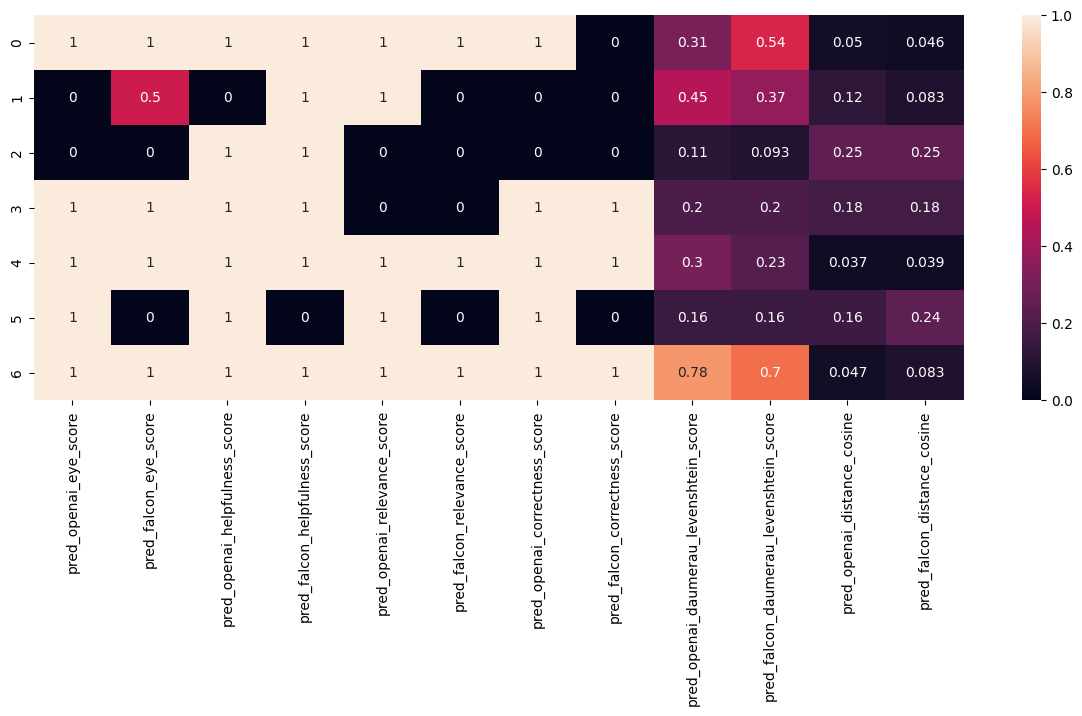

In [120]:
fig, ax = plt.subplots(figsize=(15,5))    
sns.heatmap(eval_data[plt_cols], annot=True, ax=ax)

<Axes: >

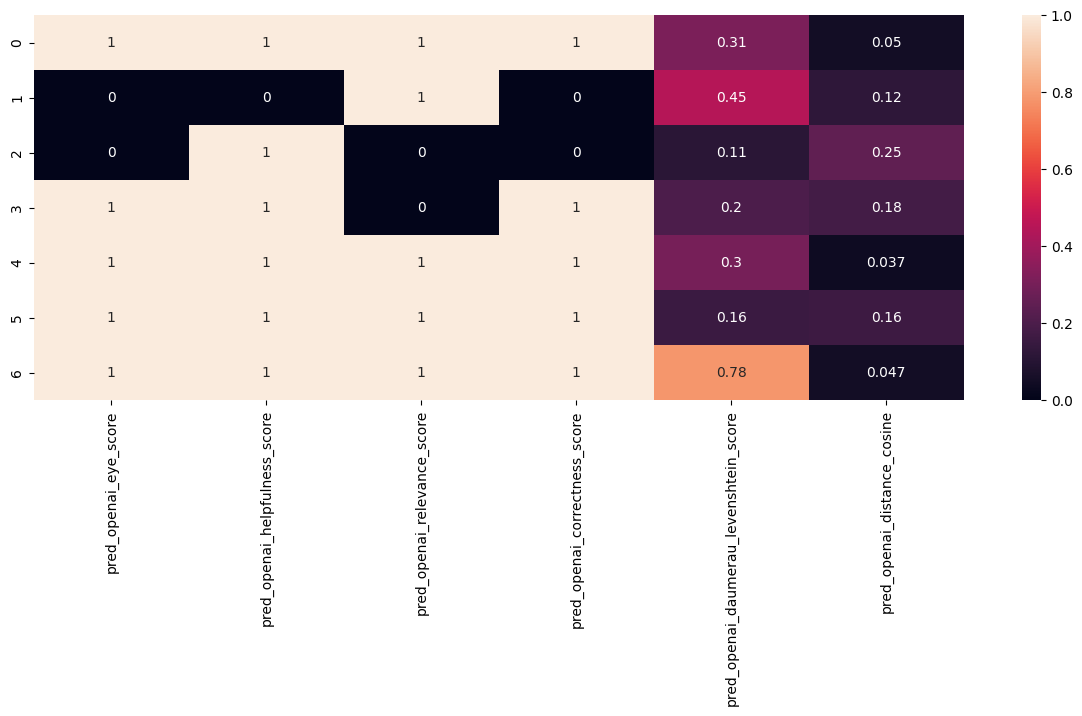

In [122]:
plt_cols_sort = [c for c in plt_cols if 'openai' in c]

fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(eval_data[plt_cols_sort], annot=True, ax=ax)

<Axes: >

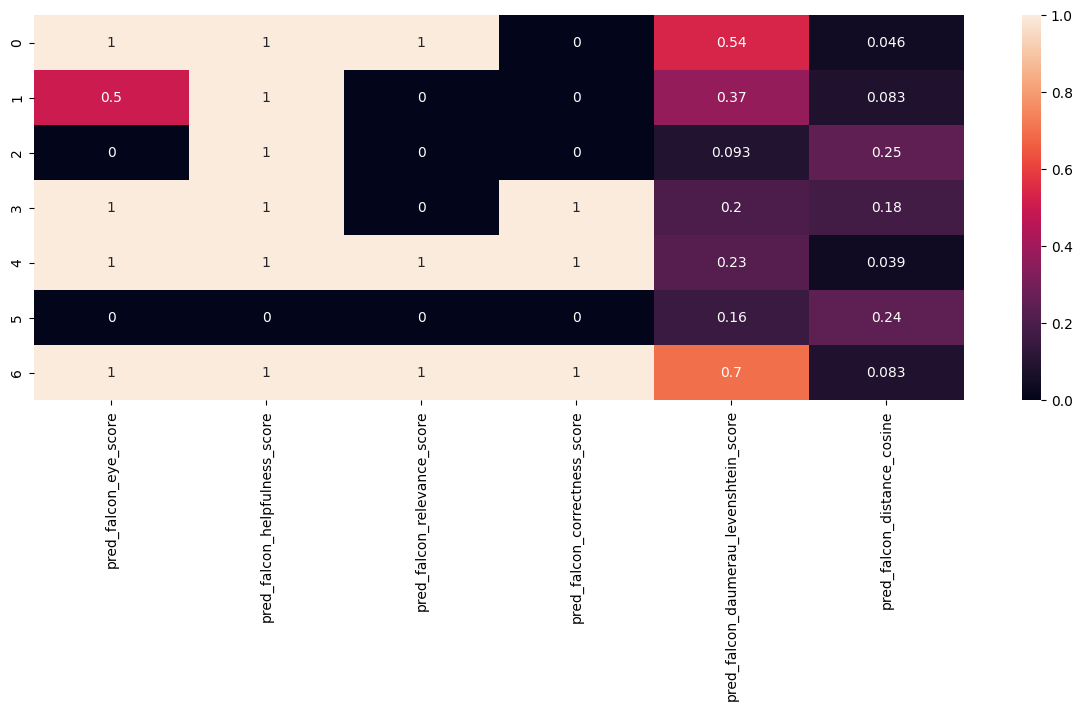

In [123]:
plt_cols_sort = [c for c in plt_cols if 'falcon' in c]

fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(eval_data[plt_cols_sort], annot=True, ax=ax)